# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/users/Lifesucks/Downloads/traffic-signs-data/train.p"
testing_file = "/users/Lifesucks/Downloads/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)
n_label = len(y_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train["labels"]))

print("Number of training examples =", n_train)
print("Number of training labels =", n_label)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of training labels = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

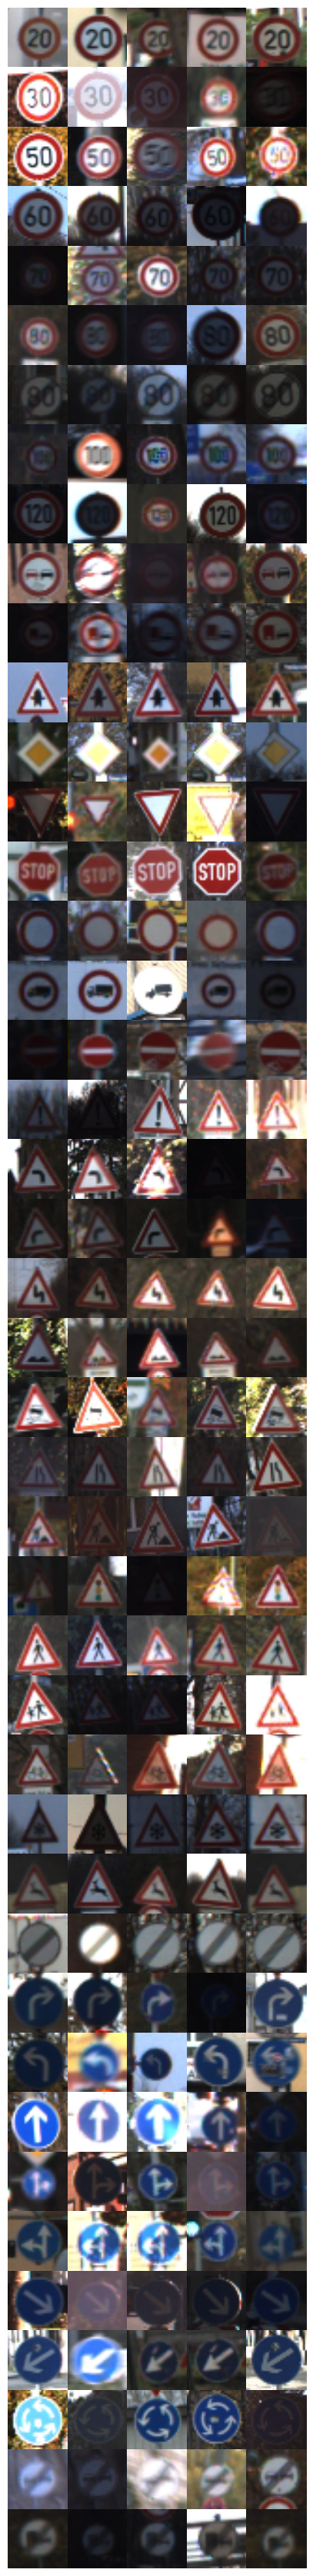

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

#plt.figure(figsize=(1,1))
#plt.imshow(image)
#print(y_train[index])

# A plot of how images look like with a random sampling from each class 
# 5 random images per class label 
import matplotlib.gridspec as gridspec 
import random 

sample_size = 5 
count = 0 
fig = plt.figure(figsize=(sample_size, n_classes)) 
grid = gridspec.GridSpec(n_classes, sample_size, wspace=0.0, hspace=0.0) 

for i in range(n_classes): 
    ind = y_train == i
    subset_x = X_train[ind,] #get all images that belong to class i
    
    for x in range(sample_size): 
        img = random.choice(subset_x) #randomly pick on image from class i 
        
        ax = plt.Subplot(fig, grid[count]) 
        ax.set_xticks([])
        ax.set_yticks([]) 
        ax.imshow(img, cmap='gray') 
        fig. add_subplot(ax)
        count +=1 
    # hide the borders
    if i == (n_classes-1): 
        all_axes = fig.get_axes() 
        for ax in all_axes: 
            for sp in ax.spines.values(): 
                sp.set_visible(False)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Covert the RGB image to grayscale
# Normalize the gray scale image by subtracting the mean from each pixel and dividing by the standard deviation
import cv2
def preprocess(data):
    #gray_img = np.dot(data[...][...,:3],[0.299,0.587,0.114])
    
    #mean_img = np.mean(gray_img, axis=0)
    #std_img = np.std(gray_img, axis=0)
    #scaled_img = gray_img - mean_img
    #norm_imgs = np.divide(scaled_img, std_img)
    #return norm_imgs
    #image = cv2.imread(data)
    #image = cv2.cvtColor(data,cv2.COLOR_BGR2RGB)
    #data[:,:,0] = cv2.equalizeHist(data[:,:,0])
    #data[:,:,1] = cv2.equalizeHist(data[:,:,1])
    #data[:,:,2] = cv2.equalizeHist(data[:,:,2])
    image = data/255.-.5 # Keep pixel values between -.5 and .5
    return image


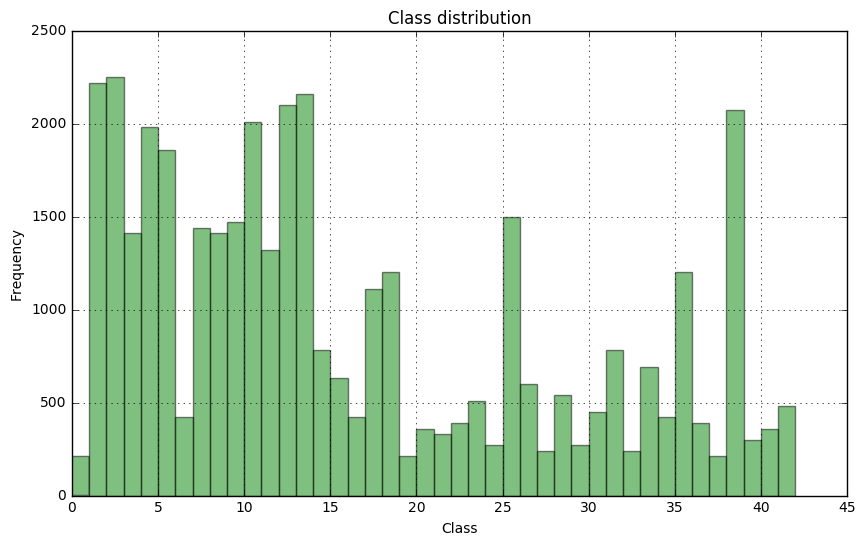

In [5]:
def class_hist(labels, labels_count):
    plt.figure(figsize=(10, 6))
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title("Class distribution")
    plt.hist(labels, labels_count-1, facecolor='green', alpha=0.5)
    plt.grid(True)
    plt.show()

class_hist(y_train, n_classes)

In [6]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)
#from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train) 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

1) Normalize the image
2) Shuffle the data

31367 31367


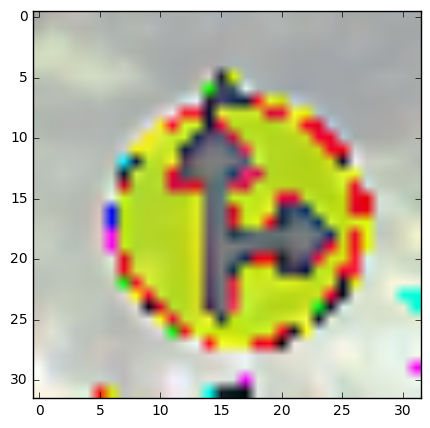

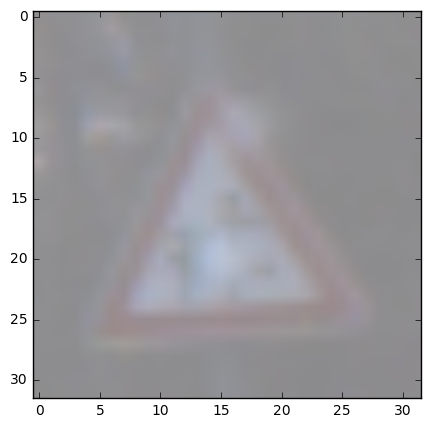

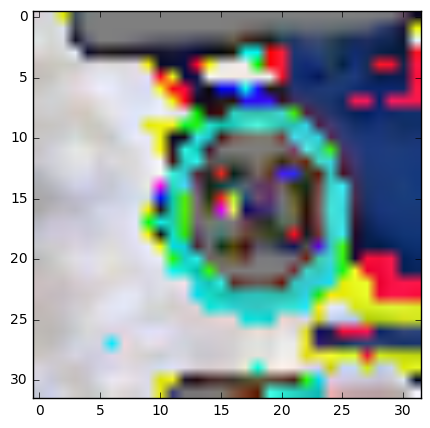

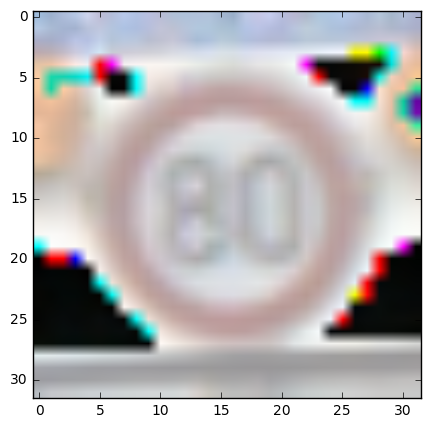

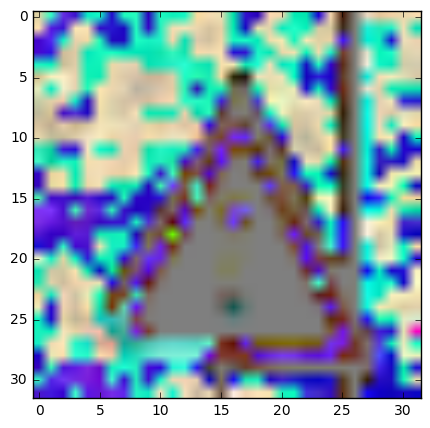

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print (len(X_train), len(y_train))
for image in X_train[:5]:
    plt.figure(figsize=(10,5))
    plt.imshow(image)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer: Validation set forms 20% of training data as that is considered optimum.
Additional data was downloaded from internet. The new signs downloaded follow american traffic sign laws and  different from the german dataset.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
   
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [9]:
EPOCHS = 25
BATCH_SIZE = 128

In [10]:
import tensorflow as tf
x = tf.placeholder(np.float32, (None, 32, 32,3))
#x_image = tf.reshape(x, [-1,32,32,1])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer: 2 convolutional layers(16 and 64 filters) and 3 fully connected layers with dropout at the end of each fully connected layer. Dropout was not necessary for convolutional layers and did not provide much improvement as they are already somewhat regularized. I could have added an additional convolutional layer with 128 units to improve the accuracy, but since I was running this on CPU, didn't want to push the limits.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
prediction = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


 **Answer: Used Adam optimizer which converged best. learning rate = .001. Batch size = 128. 30 epochs. dropout = .9
 


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:I used the Lenet architecture as the base. Experimented with different parameters like # of epochs, batch size, dropout and other normalization techniques (convert to grayscale, histogram equalize). Played around with batch size and the # of epochs and observed that if I went upto 40 epochs the accuracy did go beyond 99.3%. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.9})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'traffic_sign_classification')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.811

EPOCH 2 ...
Validation Accuracy = 0.883

EPOCH 3 ...
Validation Accuracy = 0.919

EPOCH 4 ...
Validation Accuracy = 0.938

EPOCH 5 ...
Validation Accuracy = 0.946

EPOCH 6 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Validation Accuracy = 0.962

EPOCH 8 ...
Validation Accuracy = 0.944

EPOCH 9 ...
Validation Accuracy = 0.969

EPOCH 10 ...
Validation Accuracy = 0.973

EPOCH 11 ...
Validation Accuracy = 0.967

EPOCH 12 ...
Validation Accuracy = 0.953

EPOCH 13 ...
Validation Accuracy = 0.976

EPOCH 14 ...
Validation Accuracy = 0.976

EPOCH 15 ...
Validation Accuracy = 0.958

EPOCH 16 ...
Validation Accuracy = 0.971

EPOCH 17 ...
Validation Accuracy = 0.975

EPOCH 18 ...
Validation Accuracy = 0.969

EPOCH 19 ...
Validation Accuracy = 0.982

EPOCH 20 ...
Validation Accuracy = 0.983

EPOCH 21 ...
Validation Accuracy = 0.986

EPOCH 22 ...
Validation Accuracy = 0.979

EPOCH 23 ...
Validation Accuracy = 0.980

EPOCH 24 ...
Validation Accura

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer: After using a dropout of .9 I am getting a diffrence of 5% b/w validation and testing accuracy. With dropout of .8, it shows lesser difference b/w validation and testing but then the accuracy takes little bit of hit.

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, 'traffic_sign_classification')
    #loader = tf.train.import_meta_graph('traffic_sign_classification')
    #loader.restore(sess, tf.train.latest_checkpoint('./traffic_sign_classification'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.932


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
#import skimage.data
#import skimage.transform
#import cv2
#from PIL import Image
#import numpy as np
#x = tf.placeholder("float", (None, 32, 32,3))
#x = tf.reshape(x, [-1,32,32,1])
#x = tf.placeholder("float", shape=[None,32, 32,1])
#y = tf.nn.softmax(logits)
#init_op = tf.initialize_all_variables()

#img1=mpimg.imread('../documents/p3.png')
#img2=mpimg.imread('../documents/slippery.jpg')
#img3=mpimg.imread('../documents/20speedlimit.jpg')
#img1 = tf.image.resize_images(img1, (32, 32))
#print (img1.get_shape())
#img2 = tf.image.resize_images(img2, (32, 32))
#img3 = tf.image.resize_images(img3, (32, 32))
#img1 = img1.eval()
#img1_np = np.reshape(img1, (1, 32, 32, 3))
#print (np.shape(img1_np))
#img2 = np.reshape(img2, (1, 32, 32, 3))
#img3 = np.reshape(img3, (1, 32, 32, 3))
#img1 = cv2.resize(img1, 32, 32)
#img2 = cv2.resize(img2, 32, 32)
#img3 = cv2.resize(img3, 32, 32)


#my_x = np.concatenate(([img1], [img2], [img3]), axis=0)
#print (img1.get_shape())
#top3=tf.nn.top_k(y, k=3, sorted=True, name=None)
# Run the tf.nn.top_k operation in the session
#with tf.Session() as session:
 #   session.run(init_op)
  #  top3_prob, top3_cls = session.run(top3, feed_dict={x: my_x})
   # print(top3_cls)

In [15]:
import cv2
def process_newimage_file(name):
    image = cv2.imread(name)
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    return image

import os
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))

newdata = [process_newimage_file("../new_images/"+name) for name in os.listdir("../new_images/")]
#namenewdata = [name for name in os.listdir("../new_images/")]
newdata = np.array(newdata ,dtype = np.float32)
print (newdata.shape)

init_op = tf.initialize_all_variables()

feed_dict_new = {x:newdata,
                            keep_prob: 1}
top3 = tf.nn.top_k(prediction, 3)

with tf.Session() as session:
    session.run(init_op)
    top3_pred = session.run([prediction, top3], feed_dict={x:newdata,
                            keep_prob: 1})
    print (top3_pred)

(4, 32, 32, 3)
[array([[  3.08462372e-03,   1.06143614e-03,   7.63295451e-04,
          2.52614040e-02,   3.94965493e-04,   8.45876231e-04,
          6.16003200e-03,   7.41395028e-03,   2.93407794e-02,
          1.15112318e-02,   1.19368418e-03,   7.35818234e-04,
          1.00020654e-02,   1.77400969e-02,   8.78671631e-02,
          4.11934359e-03,   8.51517252e-04,   3.23025997e-05,
          8.09018500e-03,   1.77177116e-01,   2.96009908e-04,
          2.73159534e-01,   1.61728300e-02,   2.86060758e-03,
          2.40861941e-02,   9.22848063e-04,   5.35458000e-03,
          2.63432879e-03,   3.15781720e-02,   1.36439484e-02,
          9.30403639e-03,   4.42945175e-02,   2.16481723e-02,
          2.22323448e-04,   2.56738998e-02,   2.54288353e-02,
          5.08745247e-03,   1.19383736e-02,   4.65009324e-02,
          1.25921639e-02,   6.63146051e-03,   9.65981465e-03,
          1.66621003e-02],
       [  2.40686312e-02,   7.88012811e-04,   1.32965297e-03,
          4.47877049e-02,  

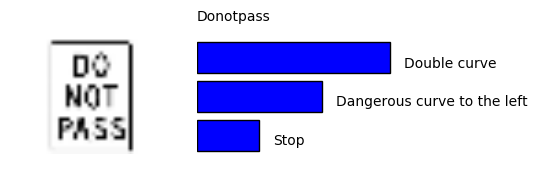

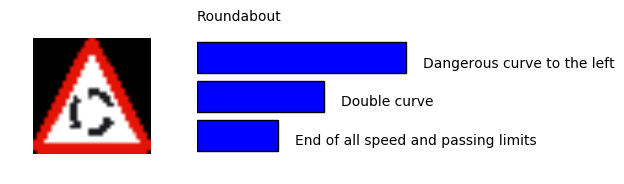

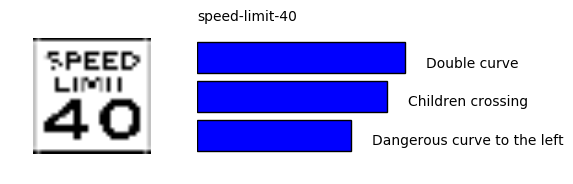

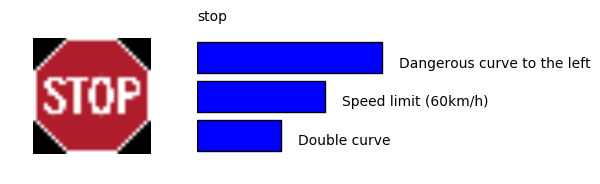

In [18]:
# Visualize the top 3 predictions and match with the actual image.
import pandas as pd
import matplotlib.gridspec as gridspec
namenewdata = [name for name in os.listdir("../new_images/")]
data_pd = pd.read_csv('signnames.csv')
for i in range(4):
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(newdata[i]+.5)
    #plt.imshow(newdata[i])
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(3),top3_pred[1][0][i], align='center') # Plot a horozontal bar plot
    for i_label in range(3):
        plt.text(top3_pred[1][0][i][i_label]+.02,6-i_label-.25,
            data_pd['SignName'][top3_pred[1][1][i][i_label]])
    plt.axis('off');
    plt.text(0,6.95,namenewdata[i].split('.')[0]);
    plt.show();

In [ ]:
The model performs really poorly for the images taken from web because these images are not similar 
to the images on training/test test, generalization is bad.